In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import numpy as np
import itertools
from eval_model import *

      disposable_income
year                   
2000              23112
2001              23716
2002              24296
2003              24999
2004              25404
2005              25978
2006              26088
2007              26167
2008              25460
2009              24180
2010              24758
2011              24856
2012              24711
2013              24863
2014              25591
2015              26098
2016              26392
2017              27192
2018              27334
2019              28118
2020              23750
2021              26589


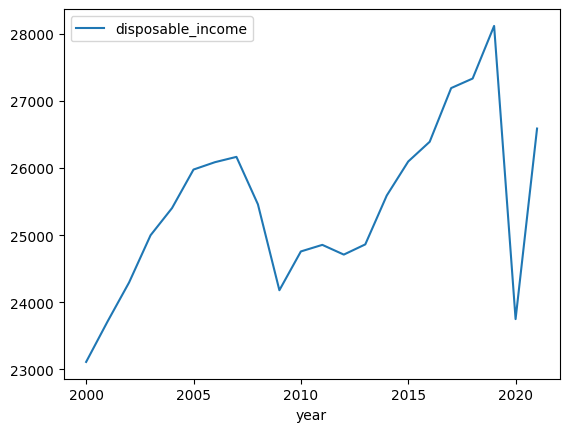

In [56]:
df = pd.read_csv('finances.csv')
df.columns=["year","disposable_income"]

df.set_index('year', inplace=True)
df.plot()
print(df)

In [57]:
def adfuller_test(ppm):
    result = adfuller(ppm)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value, label in zip(result,labels):
        print(f'{label}: {value}' )

    print('Stationary' if result[1] <= 0.05 else 'Non-stationary')

adfuller_test(df['disposable_income'])

ADF Test Statistic: -2.560251105506146
p-value: 0.1014939456092726
#Lags Used: 4
Number of Observations: 17
Non-stationary


In [58]:
df['First Difference'] = df['disposable_income'] - df['disposable_income'].shift(1)
df['Seasonal First Difference']=df['disposable_income']-df['disposable_income'].shift(12)

df

,disposable_income,First Difference,Seasonal First Difference
year,,,
2000,23112,NaN,NaN
2001,23716,604.0,NaN
2002,24296,580.0,NaN
2003,24999,703.0,NaN
2004,25404,405.0,NaN
2005,25978,574.0,NaN
2006,26088,110.0,NaN
2007,26167,79.0,NaN
2008,25460,-707.0,NaN


In [59]:
adfuller_test(df['Seasonal First Difference'].diff().dropna())

ADF Test Statistic: -7.369929395347163
p-value: 9.027836180223553e-11
#Lags Used: 0
Number of Observations: 8
Stationary


<AxesSubplot:xlabel='year'>

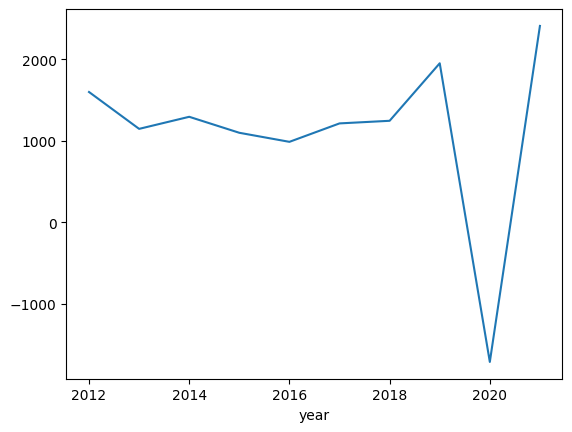

In [60]:
df['Seasonal First Difference'].plot()

C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


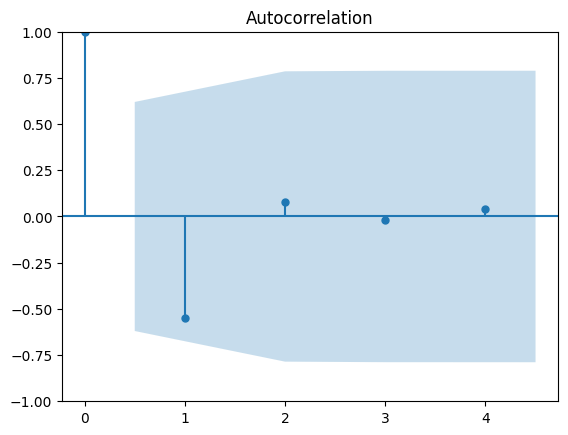

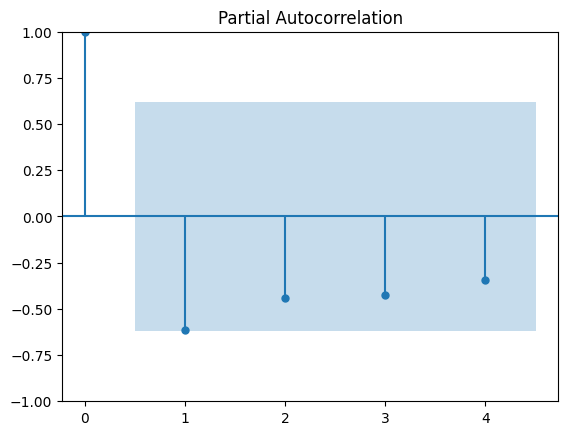

In [61]:
plot_acf(df['Seasonal First Difference'].dropna(), lags=4)
plot_pacf(df['Seasonal First Difference'].dropna(), lags=4)
plt.show()

In [78]:

model = ARIMA(df['disposable_income'], order=(1,2,1))
model_fit = model.fit()
future_incomes = list(map(lambda x: round(x), list(model_fit.forecast(steps=13).values)))
print(future_incomes)

[28887, 30828, 32532, 34080, 35524, 36900, 38230, 39530, 40811, 42079, 43337, 44591, 45840]


C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\loca

In [73]:
bivariate_stats(df["disposable_income"],pd.DataFrame(future_incomes))

PMCC: nan 
r^2:  nan 
Cov:  nan


In [70]:
df['disposable_income']
future_incomes

,0
0,28887.327191
1,30828.017870
2,32532.144264
3,34079.791502
4,35523.933145
5,36899.609389
6,38229.998120
7,39530.430715
8,40811.048354
9,42078.559079
